# t-SNE visualization of CIFAR-100 models

In [2]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import torch
import sys
sys.path.append("/data/mmc_lyxiang/KD/logit-standardization-KD-master/")
from mdistiller.models import cifar_model_dict, cifar_emodel_dict
from mdistiller.dataset import get_dataset
from mdistiller.engine.utils import load_checkpoint
from mdistiller.engine.cfg import CFG as cfg

In [3]:
# visualize t-SNE
def get_tsne(stu, mpath):
    cfg.defrost()
    cfg.DISTILLER.STUDENT = stu
    cfg.DATASET.TYPE = 'cifar100'
    cfg.freeze()
    train_loader, val_loader, num_data, num_classes = get_dataset(cfg)
    model = cifar_model_dict[cfg.DISTILLER.STUDENT][0](num_classes=num_classes)
    model.load_state_dict(load_checkpoint(mpath)["model"])
    all_features, all_labels = [], []
    model.eval()
    with torch.no_grad():
        for i, (data, labels) in tqdm(enumerate(val_loader)):
            outputs, features = model(data)
            all_features.append(features['pooled_feat'].data.cpu().numpy())
            all_labels.append(labels.data.cpu().numpy())
    all_features = np.concatenate(all_features, 0)
    all_labels = np.concatenate(all_labels, 0)

    tsne = TSNE()
    all_features = tsne.fit_transform(all_features)
    plot_features(all_features, all_labels, num_classes)

def plot_features(features, labels, num_classes):
    colors = ['C' + str(i) for i in range(num_classes)]
    plt.figure(figsize=(6, 6))
    for l in range(num_classes):
        plt.scatter(
            features[labels == l, 0],
            features[labels == l, 1],
            c=colors[l], s=1, alpha=0.4)
    plt.xticks([])
    plt.yticks([])
    plt.show()

Files already downloaded and verified
Files already downloaded and verified


/data/mmc_lyxiang/KD/logit-standardization-KD-master/mdistiller/engine/utils.py:204: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location="cpu")
1

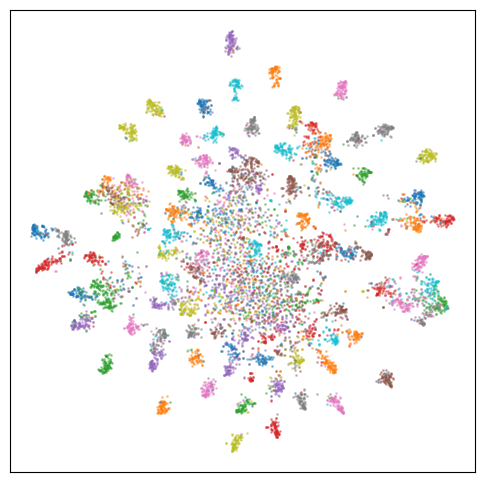

In [5]:
# KD baseline
# mpath = "/home/ssq/Desktop/phd/KD/mdistiller-master/output/cifar100_baselines_0/kd,res32x4,res8x4/student_best"
model_path = "/data/mmc_lyxiang/KD/logit-standardization-KD-master/output/Resnet32x4_Resnet8x4(226)/setting_63(random_train)_run0/student_best"
get_tsne("resnet8x4", model_path)

Files already downloaded and verified
Files already downloaded and verified


/data/mmc_lyxiang/KD/logit-standardization-KD-master/mdistiller/engine/utils.py:204: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location="cpu")
1

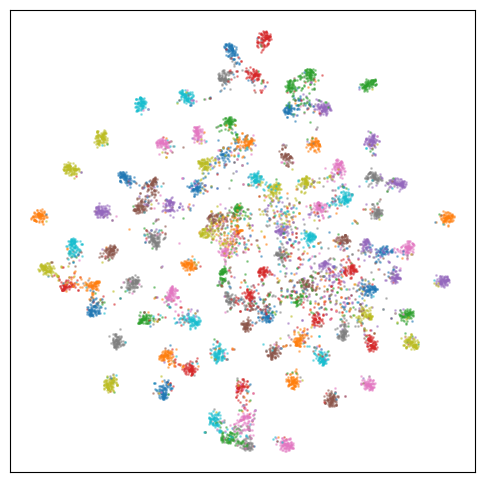

In [6]:
# Teacher ResNet32x4
mpath = "/data/mmc_lyxiang/KD/logit-standardization-KD-master/output/Teacher_resnet32x4(226)/trained_lamb(exp)(seed5)/student_240"
get_tsne("resnet32x4", mpath)

Files already downloaded and verified
Files already downloaded and verified


157it [00:14, 10.82it/s]


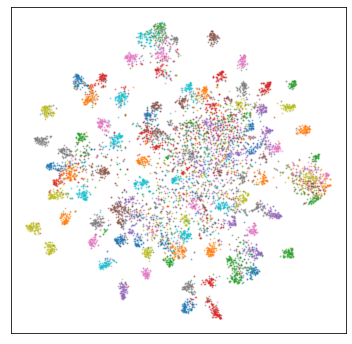

In [5]:
# DKD
mpath = "/home/ssq/Desktop/phd/KD/mdistiller-master/output/cifar100_baselines_0/dkd,res32x4,res8x4/student_best"
get_tsne("resnet8x4", mpath)

Files already downloaded and verified
Files already downloaded and verified


/data/mmc_lyxiang/KD/logit-standardization-KD-master/mdistiller/engine/utils.py:204: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location="cpu")
1

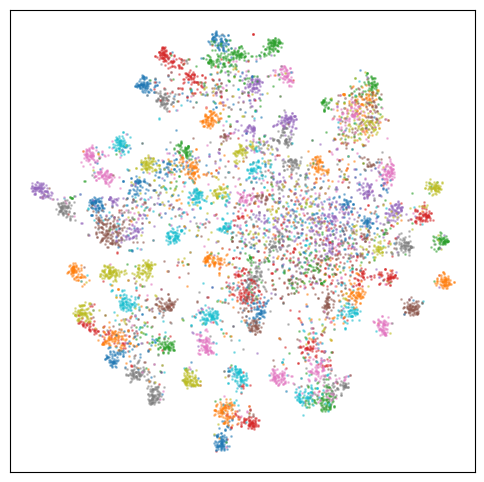

In [4]:
# KD baseline with ours
# mpath = "/home/ssq/Desktop/phd/KD/mdistiller-master/output/cifar100_baselines/kd,res32x4,res8x4/student_best"
mpath = "/data/mmc_lyxiang/KD/logit-standardization-KD-master/output/Resnet32x4_Resnet8x4(226)/original_KDseed1/student_best"
get_tsne("resnet8x4", mpath)

Files already downloaded and verified
Files already downloaded and verified


157it [00:14, 10.73it/s]


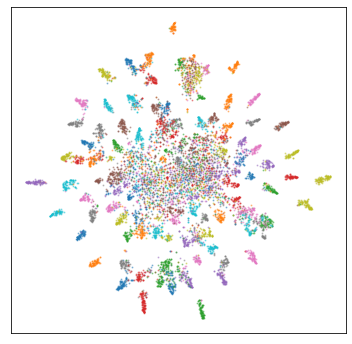

In [6]:
# DKD with ours
mpath = "/home/ssq/Desktop/phd/KD/mdistiller-master/output/cifar100_baselines/dkd,res32x4,res8x4/student_best"
get_tsne("resnet8x4", mpath)

Files already downloaded and verified
Files already downloaded and verified


157it [00:14, 10.94it/s]


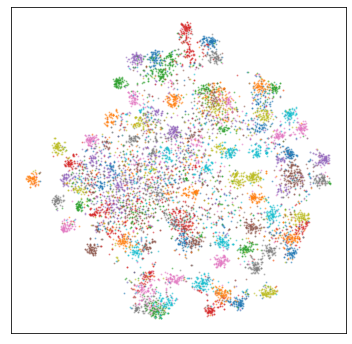

In [3]:
# CTKD baseline
mpath = "/home/ssq/Desktop/phd/KD/mdistiller-master/output/ctkd/kd/resnet8x4_best.pth"
get_tsne("resnet8x4", mpath)

Files already downloaded and verified
Files already downloaded and verified


157it [00:10, 15.00it/s]


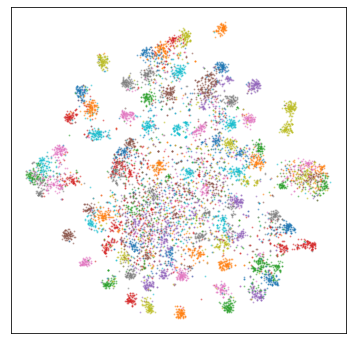

In [3]:
# CTKD with ours
mpath = "/home/ssq/Desktop/phd/KD/Multi-Level-Logit-Distillation-main/output/cifar100_baselines/kd_ours,res32x4,res8x4/student_best"
get_tsne("resnet8x4", mpath)

Files already downloaded and verified
Files already downloaded and verified


157it [00:09, 16.32it/s]


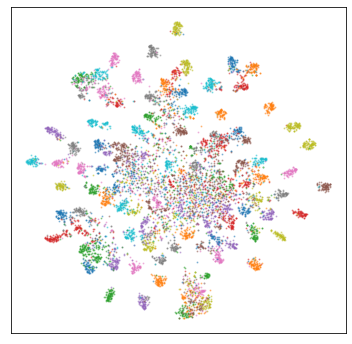

In [4]:
# CTKD baseline
mpath = "/home/ssq/Desktop/phd/KD/Multi-Level-Logit-Distillation-main/output/cifar100_baselines/kd_ours,res32x4,res8x4_1/student_best"
get_tsne("resnet8x4", mpath)